<a href="https://colab.research.google.com/github/vedkharat/DataScienceInternship/blob/main/Day8_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Programmer: Ved Kharat
#College: Keystone
#Class:TE-A
#Roll No:35

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/banknotes.csv')
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
df.isna().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [6]:
df.shape

(1372, 5)

In [8]:
x=df.drop('Class',axis=1)
y=df['Class']

In [9]:
x

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [10]:
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='Class', ylabel='count'>

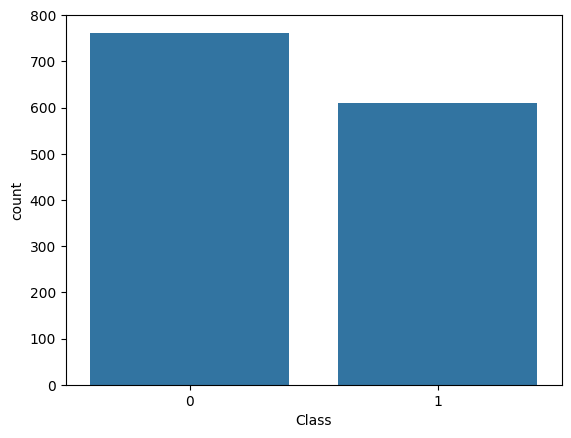

In [11]:
sns.countplot(x=y)

In [12]:
y.value_counts()

Class
0    762
1    610
Name: count, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)

In [15]:
x_train.shape

(1029, 4)

In [16]:
y_train.shape

(1029,)

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
dt=DecisionTreeClassifier(random_state=0)

In [20]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [21]:
y_pred=dt.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(y_test,y_pred)

0.9795918367346939

Evaluation

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay

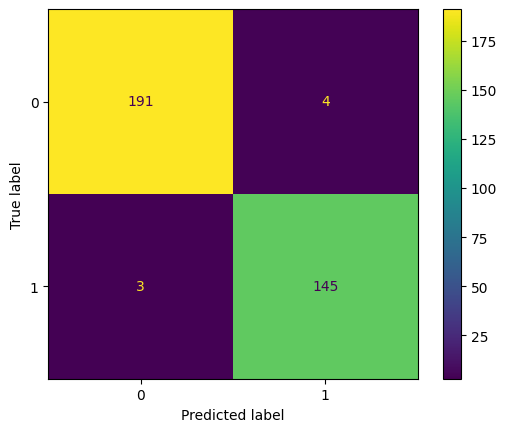

In [28]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       195
           1       0.97      0.98      0.98       148

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



In [30]:
accuracy_score(y_test,y_pred)

0.9795918367346939

In [31]:
from sklearn.tree import plot_tree

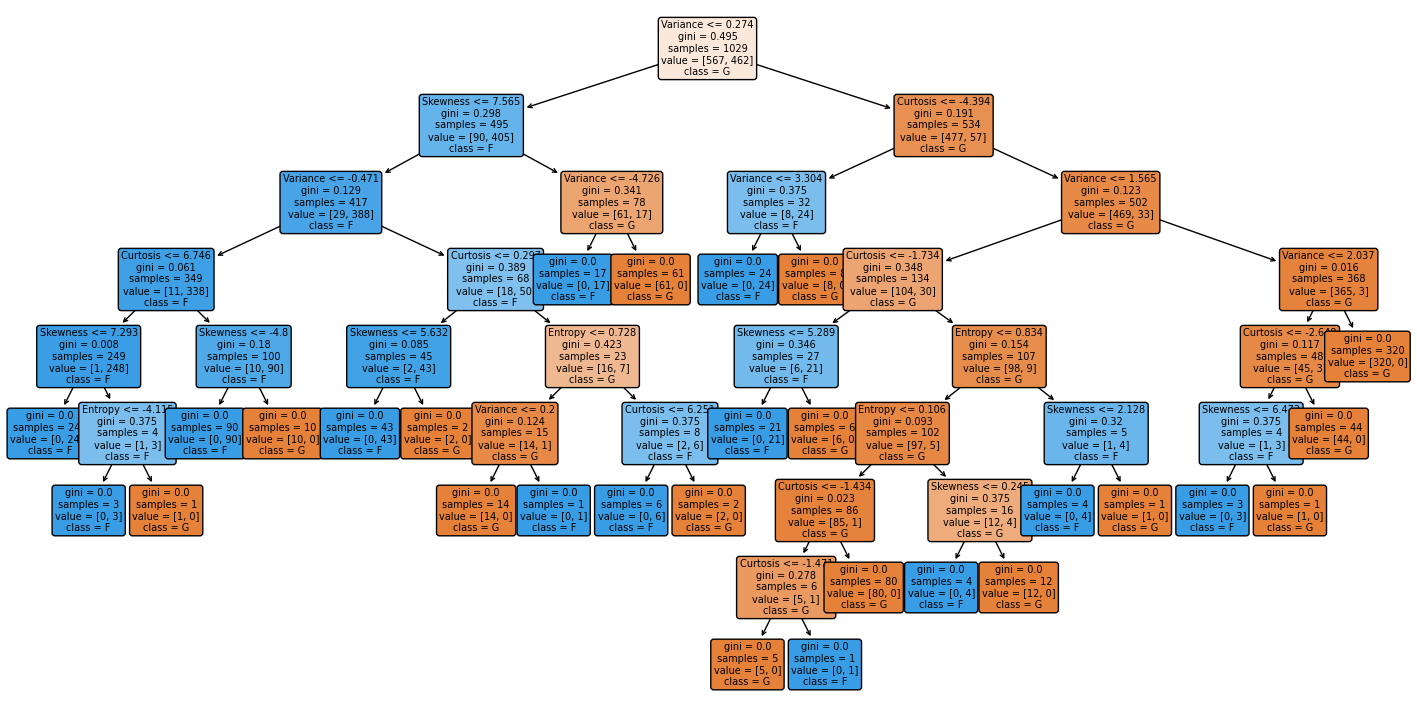

In [37]:
plt.figure(figsize=(18,9))
plot_tree(dt,fontsize=7,filled=True,rounded=True,class_names=['G','F'],feature_names=x.columns);

In [38]:
dt.feature_importances_

array([0.62095248, 0.21106862, 0.14189251, 0.02608639])

<BarContainer object of 4 artists>

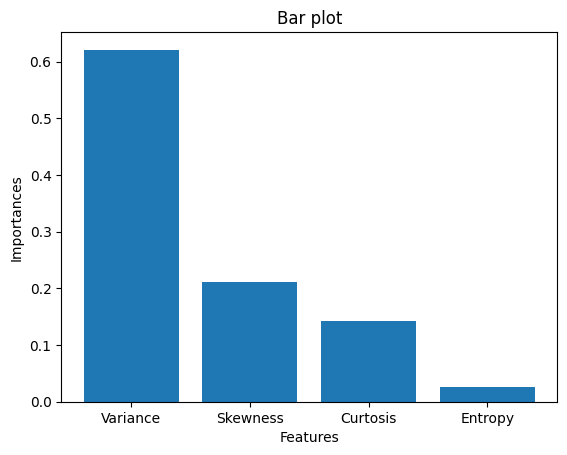

In [48]:
plt.title('Bar plot')
plt.xlabel('Features')
plt.ylabel('Importances')
plt.bar(x.columns,dt.feature_importances_)